<a href="https://colab.research.google.com/github/lindasheila/Seaborn-Supermarket-Sales-Data-Visualization/blob/main/Copy_of_%5BGuiding_Notebook%5D_AfterWork_Data_Visualisation_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfterWork Data Science: Data Visualisation with Seaborn


## 1. Business Understanding




As a data analyst working with Quick Mart chain of supermarkets, the task is to create an analysis report, complete with recommendations to guide the management team on a marketing strategy decision.

The report should include:
- Which product categories performed best.
- Which branches had the highest sales and profits
- What key trends in sales in each branch are noticeable over the time.
- The average amount spent by customers for each branch.
The average rating for each branch.

## 2. Data Exploration

In [ ]:
# Loading libraries
# ---
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Loading the dataset
# ---
# Dataset url = https://bit.ly/SupermarketsDS
# ---
# YOUR CODE GOES HERE

data=pd.read_csv('https://bit.ly/SupermarketsDS')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Determining the size
# ---
# YOUR CODE GOES HERE
data.shape
print('The data has', data.shape[0], 'rows and ', data.shape[1], 'columns')
print('The size of the data is:', data.size)

The data has 1000 rows and  17 columns
The size of the data is: 17000


In [ ]:
# Checking the datatypes
# ---
# YOUR CODE GOES HERE
data.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [ ]:
# Statistical summary
# ---
# YOUR CODE GOES HERE

data.describe()



,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## 3. Data Cleaning

In [ ]:
# Checking for duplicates
# ---
# YOUR CODE GOES HERE

duplicate=data[data.duplicated()]
print(duplicate)


#data.duplicated()

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


In [ ]:
# Checking for missing values
# ---
# YOUR CODE GOES HERE
#data.isnull()
print(data.isnull().sum())

print('Any  missing values anywhere:', data.isnull().values.any().any())

data_with_missing_row = data[data.isnull().any(axis=1)]
print('Missing row:', data_with_missing_row)

data_with_missing_column = data.columns[data.isnull().any()]
print('Missing column:', data_with_missing_column)


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
Any  missing values anywhere: False
Missing row: Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []
Missing column: Index([], dtype='object')


In [ ]:
# Dropping irrelevant columns
# ---
# YOUR CODE GOES HERE
#data.drop_duplicates()
# Drop rows with any missing values (NaN)
data = data.dropna()

# Drop duplicate rows
data = data.drop_duplicates()


print('Drop empty entries')
print('Drop Duplicate')


print('The data has', data.shape[0], 'rows and', data.shape[1], 'columns')
print('The size of the data is:', data.size)

Drop empty entries
Drop Duplicate
The data has 1000 rows and 17 columns
The size of the data is: 17000


## 4. Data analysis and visualisation (Using Seaborn for visualisation)

We investigate the questions listed above in order to craft a fact-driven recommendation.

### 4.a) Questions

In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
# Question 1 - Which product categories(Product_line) performed best.
# YOUR CODE GOES HERE
data.columns
data.groupby('Product line')[['gross margin percentage',  'gross income', 'Rating', 'Total']].sum().sort_values(by='gross income', ascending=False)

,gross margin percentage,gross income,Rating,Total
Product line,,,,
Food and beverages,828.571429,2673.5640,1237.7,56144.8440
Sports and travel,790.476190,2624.8965,1148.1,55122.8265
Electronic accessories,809.523810,2587.5015,1177.2,54337.5315
Fashion accessories,847.619048,2585.9950,1251.2,54305.8950
Home and lifestyle,761.904762,2564.8530,1094.0,53861.9130
Health and beauty,723.809524,2342.5590,1064.5,49193.7390


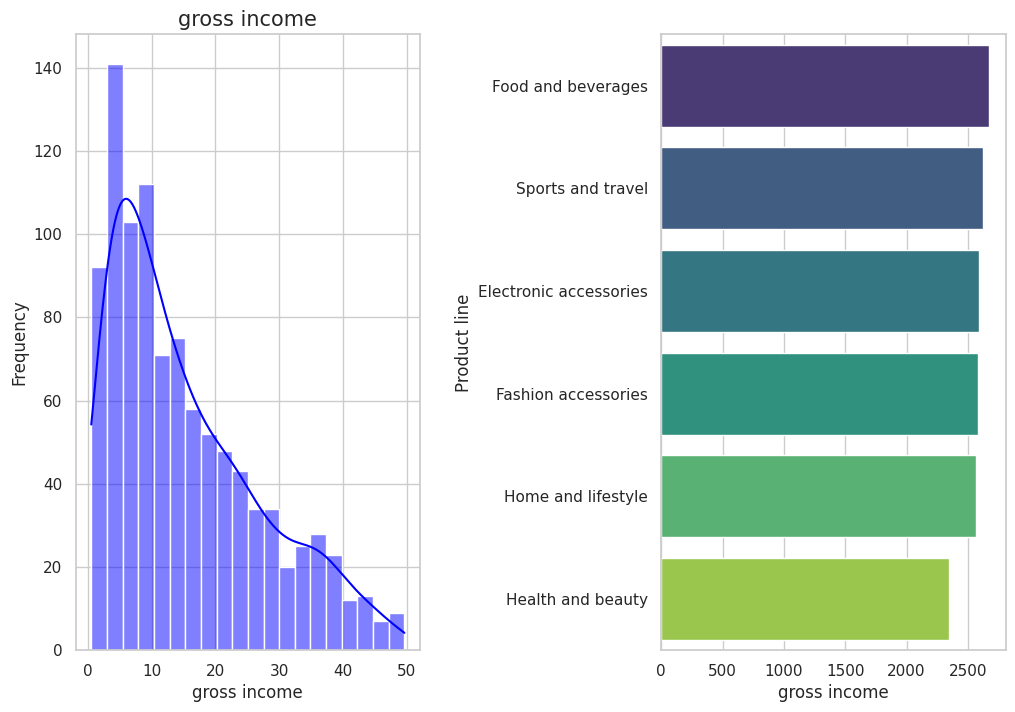

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Plot a histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.7)

sns.histplot(data['gross income'],ax=axes[0], bins=20, kde=True, color='blue')

# Add labels and title
axes[0].set_title('gross income', fontsize=15)
axes[0].set_xlabel('gross income', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

product_performance=data.groupby('Product line')[['gross margin percentage',  'gross income', 'Rating', 'Total']].sum().sort_values(by='gross income', ascending=False)

sns.barplot(y='Product line', x='gross income', ax=axes[1], data=product_performance, hue='Product line',  palette='viridis')

# Show the plot
plt.show()

              Total  gross income
Branch                           
C       110568.7065     5265.1765
A       106200.3705     5057.1605
B       106197.6720     5057.0320
The branch with the highest sales profit is: C


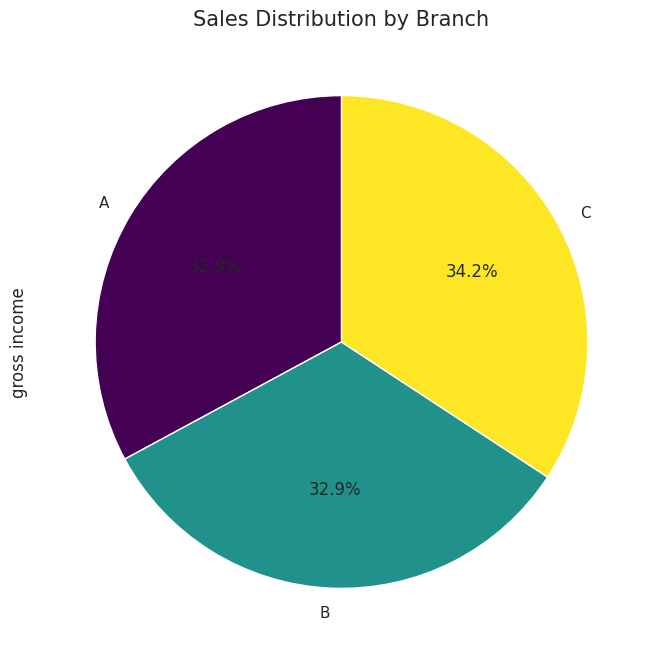

In [ ]:
# Question 2: Which branches had the highest sales and profits ?
# YOUR CODE GOES HERE

branch_performance = data.groupby('Branch')[['Total', 'gross income']].sum()
print(branch_performance.sort_values(by='gross income', ascending=False))

print(f'The branch with the highest sales profit is: C')


plt.figure(figsize=(8, 8))
branch_performance['gross income'].plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', legend=False)


plt.title('Sales Distribution by Branch', fontsize=15)


plt.show()



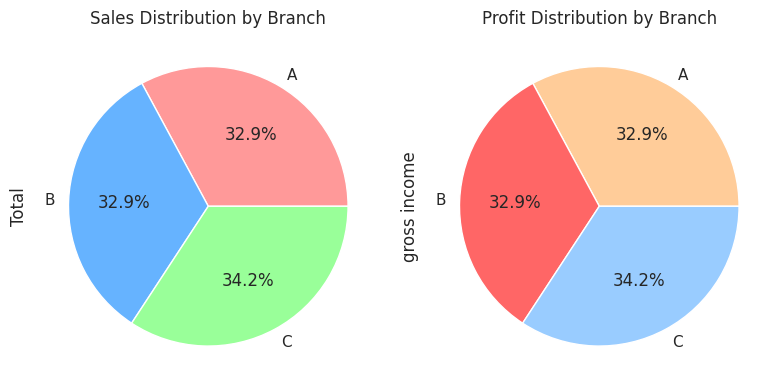

In [ ]:
import matplotlib.pyplot as plt

# Extract the Total and the gros income
sales_data = branch_performance['Total']
profit_data = branch_performance['gross income']

# Create a pie chart for Sales (Total)
plt.figure(figsize=(8, 8))

# Plotting the pie chart for Total Sales
plt.subplot(1, 2, 1)
sales_data.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99'], legend=False)
plt.title('Sales Distribution by Branch')

# Plotting the pie chart for Gross Income (Profits)
plt.subplot(1, 2, 2)
profit_data.plot(kind='pie', autopct='%1.1f%%', colors=['#FFCC99', '#FF6666', '#99CCFF'], legend=False)
plt.title('Profit Distribution by Branch')

# Show the pie chart
plt.tight_layout()
plt.show()


0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object
           Date Branch      Total
0    2019-01-01      A  2371.3200
1    2019-01-01      B  1536.6960
2    2019-01-01      C   837.1650
3    2019-01-02      A   307.0515
4    2019-01-02      B  1162.8015
..          ...    ...        ...
258  2019-03-29      B  2059.9320
259  2019-03-29      C   985.6980
260  2019-03-30      A  1320.6165
261  2019-03-30      B  1724.4570
262  2019-03-30      C  1441.9860

[263 rows x 3 columns]


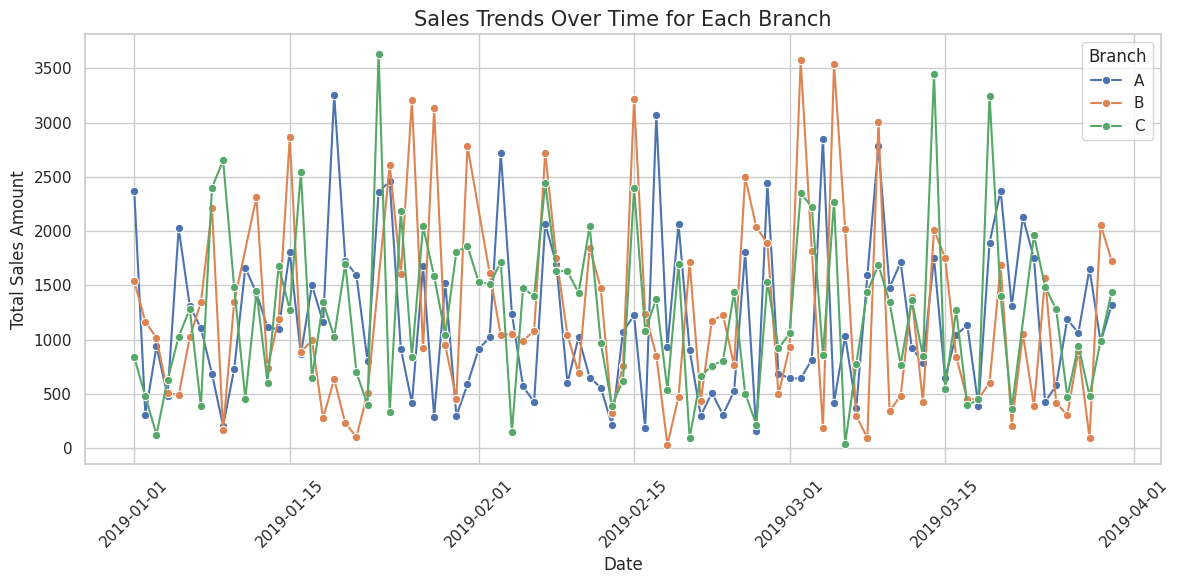

In [ ]:
# Question 3: What key trends in sales in each branch are noticeable over the time.
# YOUR CODE GOES HERE
data.columns
print(data['Date'])

data['Date'] = pd.to_datetime(data['Date'])
#print(data)

sales_trends = data.groupby([data['Date'].dt.date, 'Branch'])['Total'].sum().reset_index()
print(sales_trends )


plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='Date', y='Total', hue='Branch', marker='o')
#sns.scatterplot(data=sales_trends, x='Date', y='Total', hue='Branch', marker='o')
# Customize the plot
plt.title('Sales Trends Over Time for Each Branch', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Branch')
plt.savefig('sales_distribution_by_branch.png', bbox_inches='tight')
# Show the plot
plt.tight_layout()
plt.show()


Branch
A    312.354031
B    319.872506
C    337.099715
Name: Total, dtype: float64


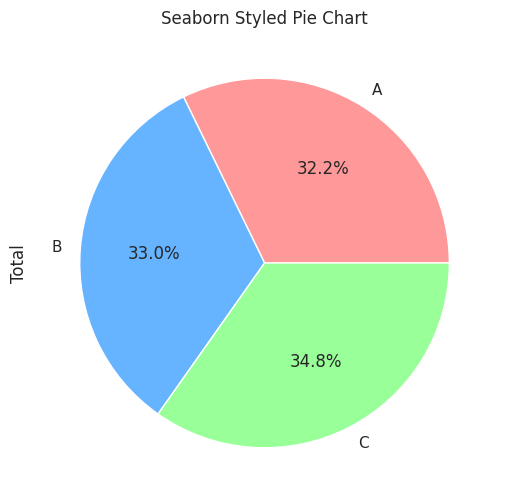

In [ ]:
# Question 4(a): The average amount spent by customers for each branch.
# YOUR CODE GOES HERE

data.columns
#average_amount = data.groupby(['Branch'])['Total'].sum().reset_index()
average_amount = data.groupby(['Branch'])['Total'].mean()
print(average_amount)
data.columns

import matplotlib.pyplot as plt
import seaborn as sns


# Apply seaborn style
sns.set_style("whitegrid")

# Create pie chart
plt.figure(figsize=(6, 6))
average_amount.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99'], legend=False)
plt.title('Sales Distribution by Branch')

# Display the plot
plt.title("Seaborn Styled Pie Chart")
plt.show()


In [ ]:
# Question 4(b):The average rating for each branch.
# YOUR CODE GOES HERE

data.columns
average_amount = data.groupby(['Branch'])['Rating'].mean().reset_index()
print(average_amount.sort_values(by='Rating', ascending=False))
data.columns

  Branch    Rating
2      C  7.072866
0      A  7.027059
1      B  6.818072


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## 5. Summary of findings

What observations did you make from your analysis?

 Branch C has slightly better customer satisfaction compared to Branches A and B. The difference in ratings could indicate that customers at Branch C might be more satisfied with their overall shopping experience, including aspects like service, product quality, or other factors, when compared to the other branches.

Which in turn result in  Branch C performing the best in terms of average sales per transaction. The compagny might explore why customers in Branch C are spending more, such as higher-priced products or better customer engagement, payment method, promotion, customer services.


Branch A has the lowest average spending per transaction, which might indicate either lower-priced products, a different customer segment, or other factors influencing customer behavior.

Over the time, all three branches (A, B, and C) exhibit significant volatility (not a clear trend) in sales throughout the period from January 1, 2019, to April 1, 2019. This suggests that sales are subject to fluctuations, possibly due to external factors or internal promotions.

While the magnitude of sales differs between branches, they seem to follow similar general patterns of peaks and troughs. This could indicate that they are influenced by common market trends or seasonal factors.

Branch A has some of the highest sales peaks but also experiences periods of very low sales, indicating a high degree of variability.

 Branch C shows more consistent sales, with neither extremely high peaks nor very low troughs compared to Branch A. This might indicate a more stable customer base or sales strategy.

Health and Beauty has the lowest gross income, and total sales. It also has the lowest customer rating, suggesting that it may not be performing as well as other categories. The most profitable product line to the compagny is Food and beverages.


## 6. Recommendations

What recommendations can you make from your analysis/observations?


This analysis could guide further investigation into why Branch C is performing better and why Branch B's rating is lower. Improving customer experience in Branch B could lead to higher ratings and potentially better sales and customer retention in the future.
Focus on increasing customer satisfaction and sales for  Food and beverages.

What the Compagny could do is to:

Determine the factors contributing to the sales fluctuations over time.

Analyze the correlation between the sales and marketing strategies of each branch to understand what drives their individual performance.

Research external factors (economic conditions, seasonal trends, etc.) that may be influencing sales and internal factors such as customer service etc.

Extend the analysis over a longer period to identify annual trends and seasonal patterns more accurately.
